Virve Rajasärkkä   
Ennakoivat analytiikkamenetelmät, HAMK   
syksy 2023

Aineisto: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Kagglen koodin mukaan

In [2]:
penguins = pd.read_csv("penguins.csv")
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


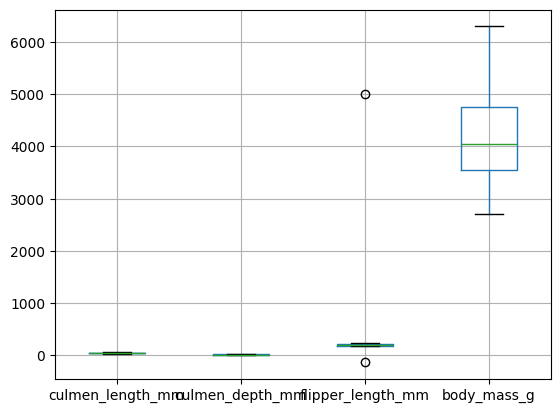

In [3]:
# bongataan outlierit
penguins.boxplot()
plt.show()

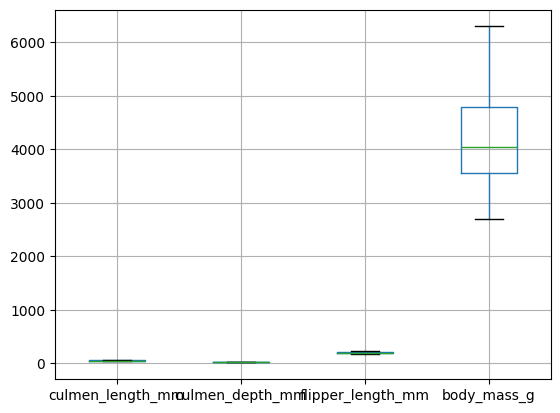

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [4]:
# poistetaan tyhjät ja outlierit
penguins = penguins.dropna()
penguins[penguins["flipper_length_mm"] > 4000]
penguins[penguins["flipper_length_mm"] < 0]
penguins_clean = penguins.drop([9, 14])
penguins_clean.boxplot()
plt.show()
penguins_clean.head()

In [5]:
# jaetaan sukupuoli-muuttuja kahtia
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [6]:
# sovitetaan ja normalisoidaan data
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_pre = pd.DataFrame(data=X, columns=df.columns)
penguins_pre.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


In [7]:
# puristetaan muuttujat kahteen
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_pre)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_pre)
print(n_components)

2


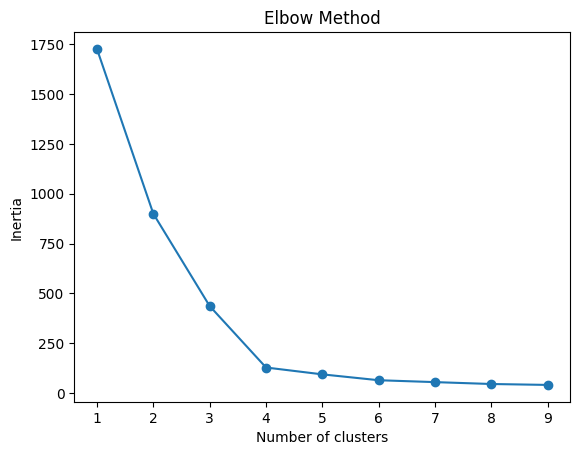

In [8]:
# kyynärpääkaavio
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

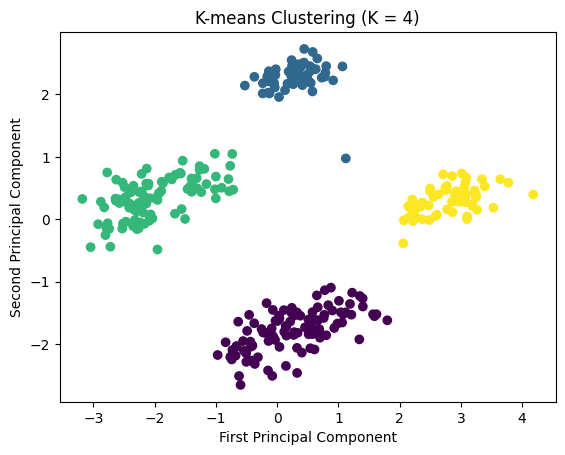

In [9]:
# piirretään klusterit
n_clusters = 4
kmeans = KMeans(n_clusters, random_state=42, n_init=10).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K = {n_clusters})")
plt.show()

## Luentoesimerkin mukaan
Otetaan käyttöön aiemman version data, josta on tyhjät jo poistettu

In [10]:
peng = penguins_clean
peng.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [11]:
# valitaan vertailuun kaksi muuttujaa, tässä räpylän pituus ja paino
X = peng.loc[:, "flipper_length_mm":"body_mass_g"]
X = np.array(X)
X

array([[ 181., 3750.],
       [ 186., 3800.],
       [ 195., 3250.],
       [ 193., 3450.],
       [ 190., 3650.],
       [ 181., 3625.],
       [ 195., 4675.],
       [ 182., 3200.],
       [ 191., 3800.],
       [ 185., 3700.],
       [ 195., 3450.],
       [ 197., 4500.],
       [ 184., 3325.],
       [ 194., 4200.],
       [ 174., 3400.],
       [ 180., 3600.],
       [ 189., 3800.],
       [ 185., 3950.],
       [ 180., 3800.],
       [ 187., 3800.],
       [ 183., 3550.],
       [ 187., 3200.],
       [ 172., 3150.],
       [ 180., 3950.],
       [ 178., 3250.],
       [ 178., 3900.],
       [ 188., 3300.],
       [ 184., 3900.],
       [ 195., 3325.],
       [ 196., 4150.],
       [ 190., 3950.],
       [ 180., 3550.],
       [ 181., 3300.],
       [ 184., 4650.],
       [ 182., 3150.],
       [ 195., 3900.],
       [ 186., 3100.],
       [ 196., 4400.],
       [ 185., 3000.],
       [ 190., 4600.],
       [ 182., 3425.],
       [ 190., 3450.],
       [ 191., 4150.],
       [ 18

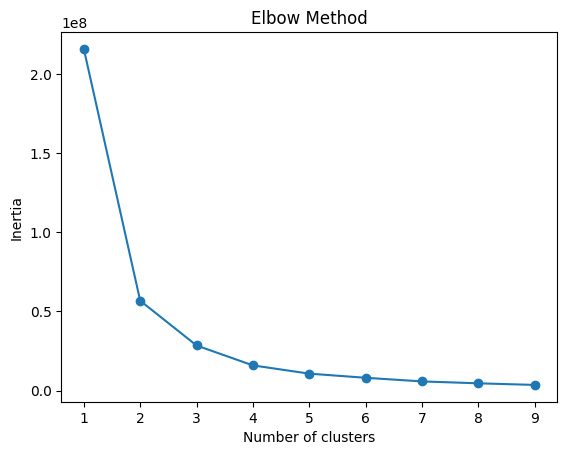

In [12]:
# kyynärpääkaavio
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [13]:
# ylemmästä versiosta päätellään, että klustereita voisi olla neljä.
init_centers = [[170, 3000], [190, 4000], [210, 5000], [230, 6000]]
init_centers = np.array(init_centers)
n_clusters = 4
kmean = KMeans(n_clusters = n_clusters, random_state=None, max_iter=0, n_init = 1)

In [14]:
def plot_my_cluster(kmeans_object, init_centers):
    fig, axes = plt.subplots(1, 2, figsize=(12,7))
    axes[0].scatter(X[:, 0], X[:, 1])
    axes[1].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis")
    axes[0].set_xlabel('Räpylän pituus')
    axes[0].set_ylabel('Paino')
    axes[1].set_xlabel('Räpylän pituus')
    axes[1].set_ylabel('Paino')
    axes[0].set_title('Original')
    axes[1].set_title('Predicted')

    axes[0].scatter(init_centers[:,0], init_centers[:,1], c='r')
    axes[1].scatter(kmeans_object.cluster_centers_[:,0], kmeans_object.cluster_centers_[:,1], c='r')
    plt.show()

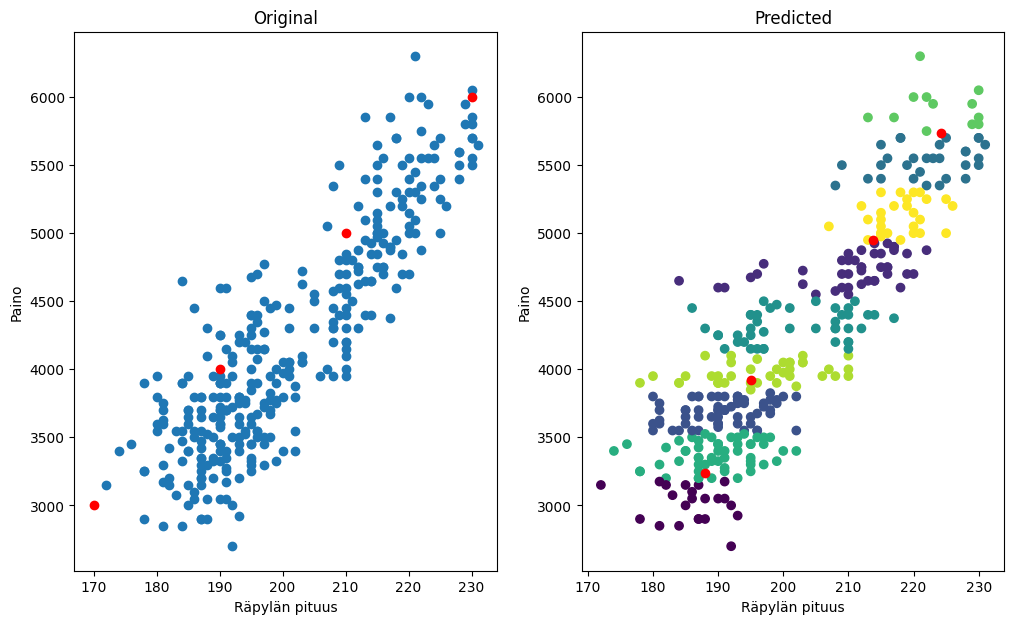

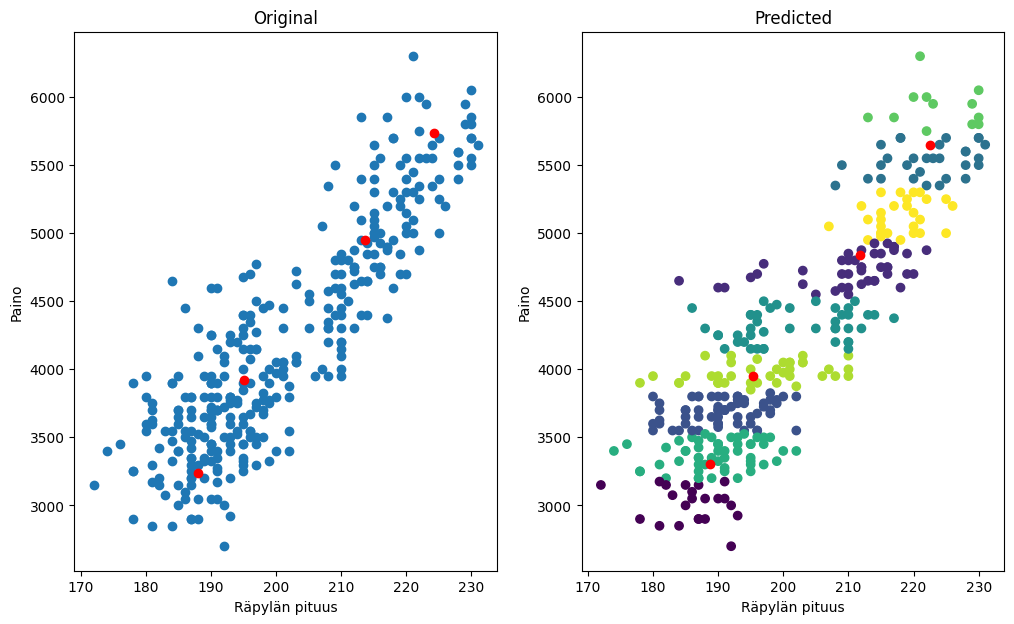

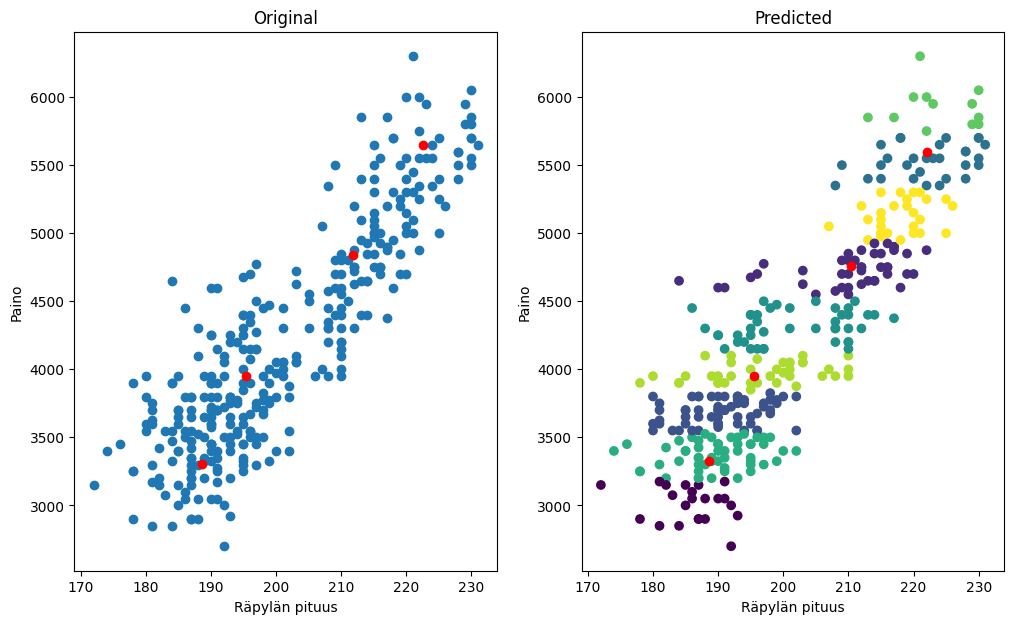

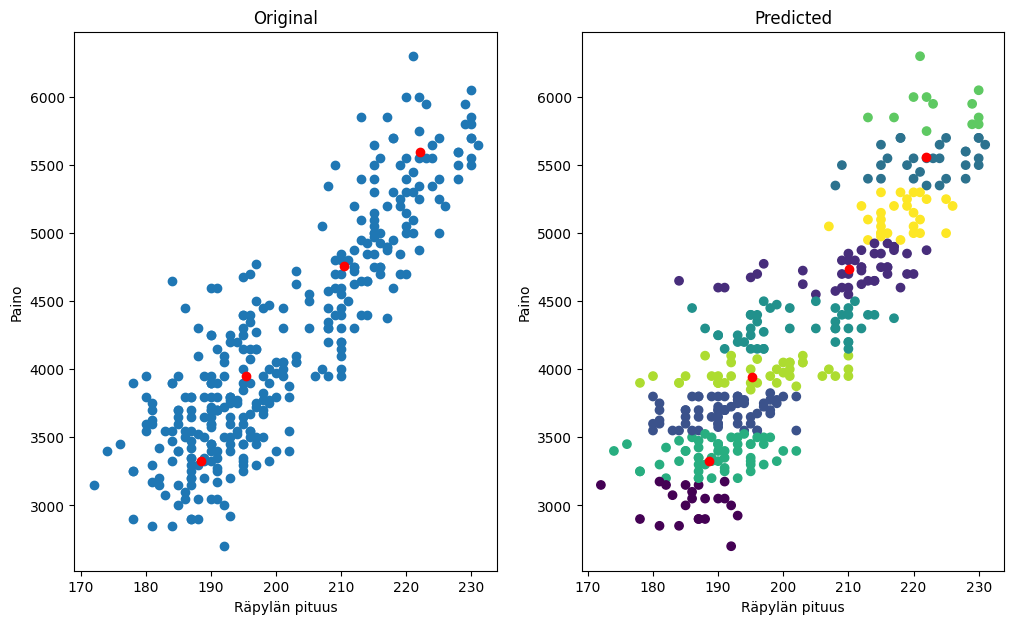

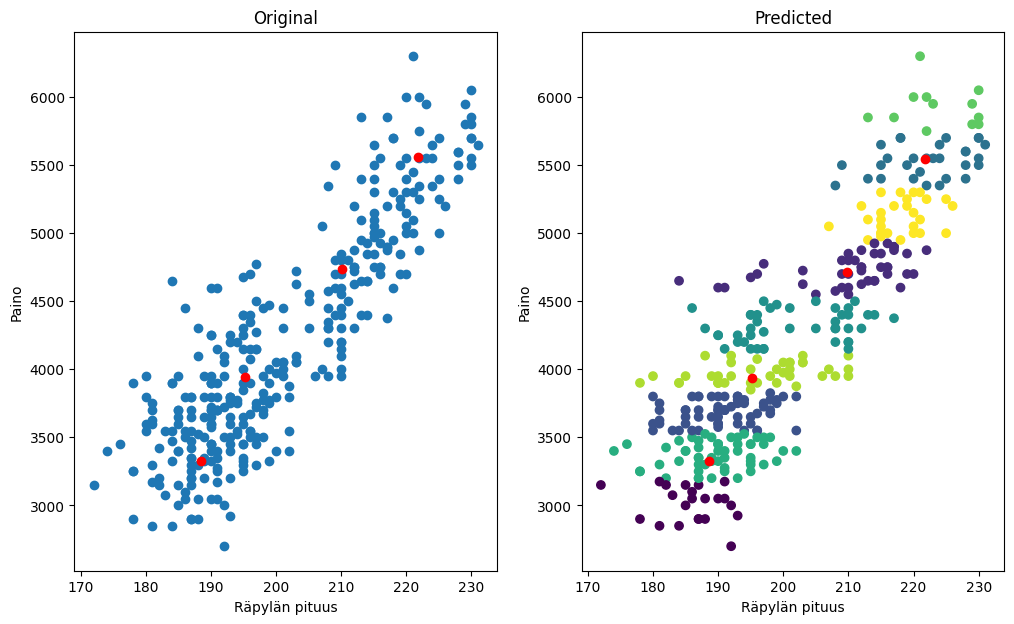

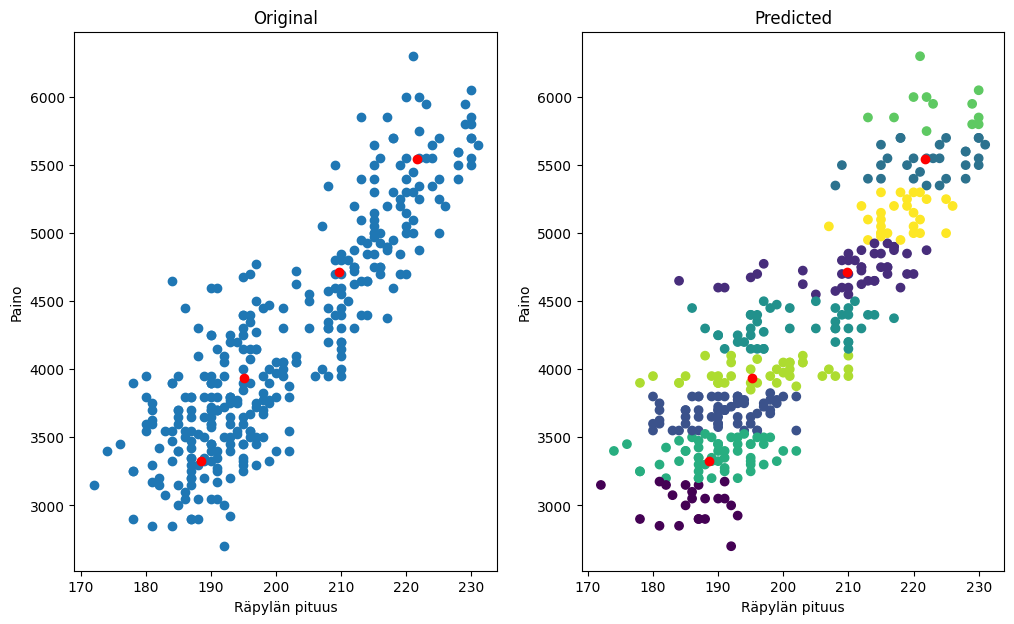

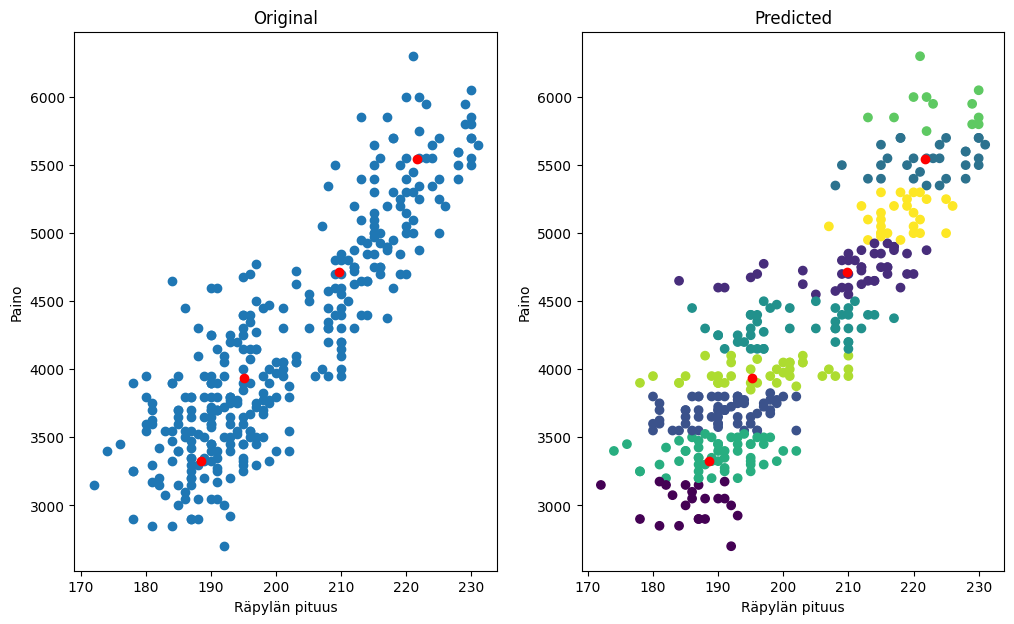

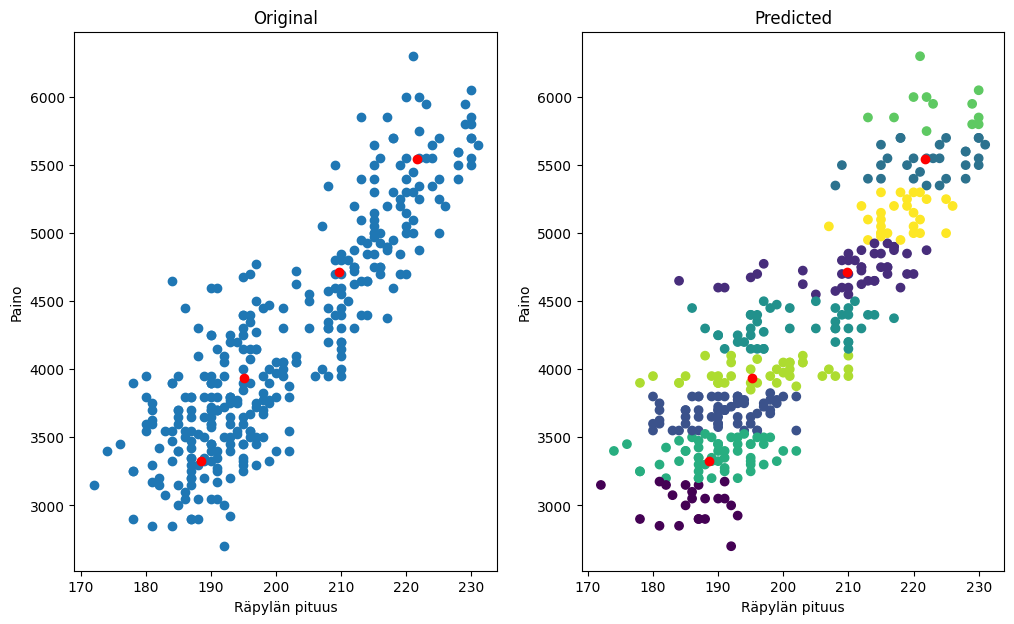

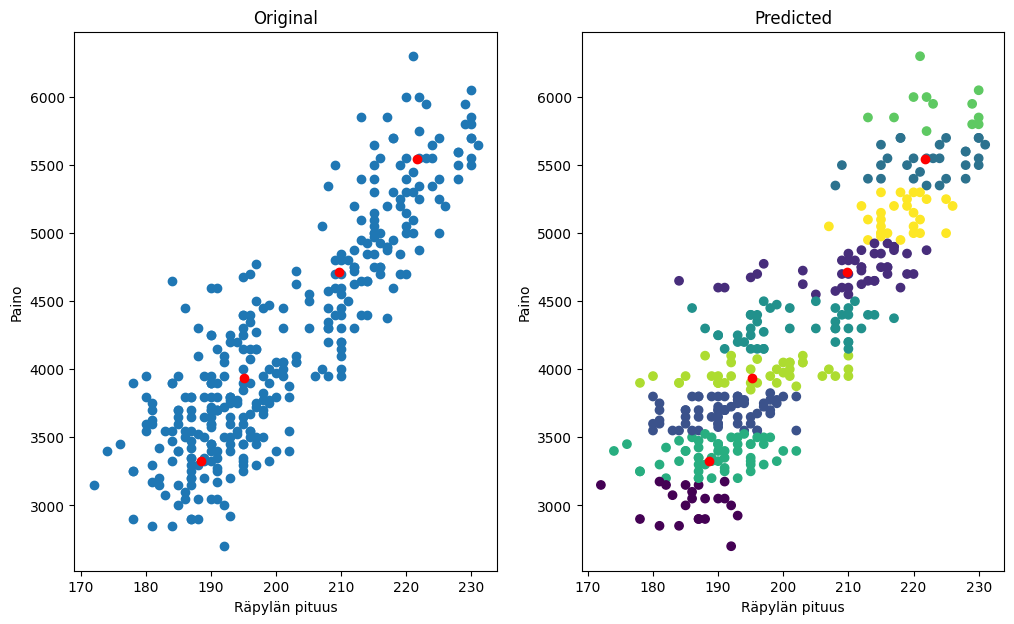

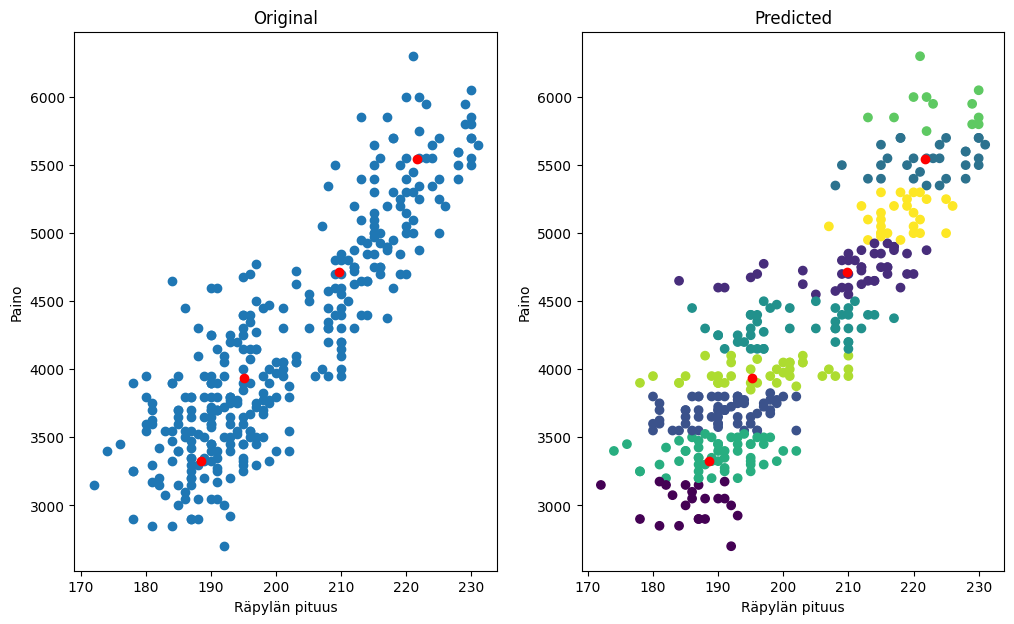

In [15]:
for i in range(10):
    kmean = KMeans(n_clusters = n_clusters, random_state=None, max_iter=1, n_init = 1, init = init_centers)
    kmean.fit(X)
    plot_my_cluster(kmean, init_centers)
    init_centers=kmean.cluster_centers_